In [45]:
import argparse
import qp
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as sciint
%matplotlib inline

In [46]:
infile = "/Users/samschmidt/PZPAPER/mystuff/test_magscat_trainingfile_probs.out"
szfile = "/Users/samschmidt/PZPAPER/mystuff/train_justsz.out"
#infile = "/Users/samschmidt/PZPAPER/mystuff/test_magscat_trainingfile_probs_top2000.out"
#szfile = "/Users/samschmidt/PZPAPER/mystuff/train_justsz_top2000.out"
z_array = np.arange(0.0050,2.1100,0.0100) #this is the grid output by BPZ for my runs
z_trues = np.loadtxt(szfile,skiprows=1)
alldata = np.loadtxt(infile,skiprows=1)
ID = alldata[:,0]
pzs = alldata[:,1:]

In [47]:
onepz = alldata[2,:]

In [48]:
print len(onepz)
tmpsz = z_trues[2]
print tmpsz

212
0.064


In [49]:
allPIT = []

In [50]:
for i in range(len(ID)):
    tmppz = pzs[i,:]
    sz = z_trues[i]
    tmpcdf = np.cumsum(tmppz)
    #print tmpcdf[-1]
    normcdf = tmpcdf/tmpcdf[-1]
    #print len(normcdf),len(z_array)
    cdfspl = sciint.InterpolatedUnivariateSpline(z_array,normcdf,k=1)
    qdata = cdfspl(sz)
    allPIT.append(qdata)
    #print qdata

In [51]:
print len(allPIT),len(ID)

111171 111171


In [52]:
npct = 100
dpct = 100./(npct)
curpct = 0.0
finpct = []
percentiles = np.arange(0,100,dpct)
for i in range(npct):
    tmpx = np.percentile(allPIT,curpct)
    finpct.append(tmpx)
    curpct += dpct
    

In [53]:
print len(percentiles),len(finpct)
QT = percentiles/100.

100 100


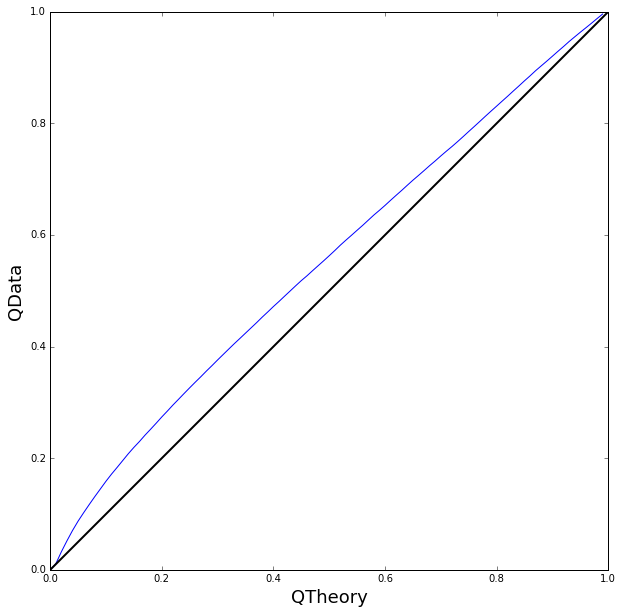

In [54]:
plt.figure(figsize=(10,10))
plt.plot(QT,finpct)
plt.plot([0,1], [0, 1], color='k', linestyle='-', linewidth=2)
plt.xlabel("QTheory",fontsize=18)
plt.ylabel("QData",fontsize=18)